# Classification Project

In this project, I have used [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) from kaggle. Based on some health conditions of an individual my model will predict whether he has any cardiovascular disease or not.

Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('cardio_train.csv',sep=';')
# Check the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [2]:
raw_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
print(f"Missing values are present: {raw_data.isnull().sum().any()}")

Missing values are present: False


* There is no mising value in the data.
* I will drop column 'id' as it is irrelevant to target variable.
* Transform age column into years instead of days.
* Gender feature should not be categorized into 1 and 2 because 2 is always numerically bigger than 1, the model would take into account that and give a bigger ratio to one gender for having a disease. So, I will make that binary.
* I will check and drop duplicates.

In [4]:
raw_data.drop('id',axis=1,inplace=True)
raw_data.age = np.round(raw_data.age/365.25,decimals=1)
raw_data.gender = raw_data.gender.replace(2,0)

In [5]:
raw_data.duplicated().sum()

674

In [6]:
raw_data.drop_duplicates(inplace=True)

# Exploratory Data Analysis and Data Preprocessing

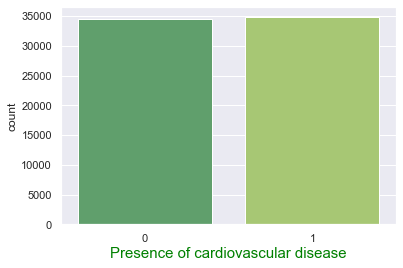

In [7]:
sns.set_style('darkgrid')
sns.countplot(raw_data.cardio,palette='summer')
plt.xlabel('Presence of cardiovascular disease',fontdict={'fontsize': 15,'color':'Green'},labelpad=3);

So, data is almost balanced. Let's see which gender has more cases of disease. As in this data there was no knowledge of which gender is denoted by which number, I will use simple fact that women's average age is less than that of men.

In [8]:
a = raw_data[raw_data["gender"]==0]["height"].mean()
b = raw_data[raw_data["gender"]==1]["height"].mean()
if a > b:
    gender = "male"
    gender1 = "female"
else:
    gender = "female"
    gender1 = "male"
print("Gender:0 is "+ gender +" & Gender:1 is " + gender1)

Gender:0 is male & Gender:1 is female


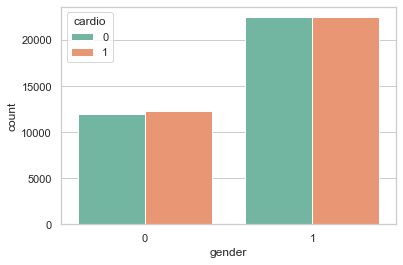

In [9]:
sns.set_style('whitegrid')
sns.countplot(raw_data.gender,hue=raw_data.cardio, palette="Set2");

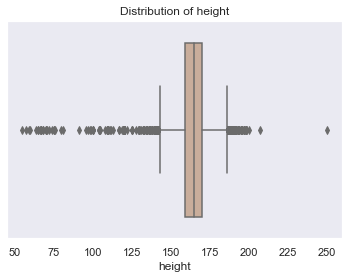

In [10]:
sns.set_style('dark')
sns.boxplot(raw_data.height,palette='pink')
plt.title('Distribution of height');

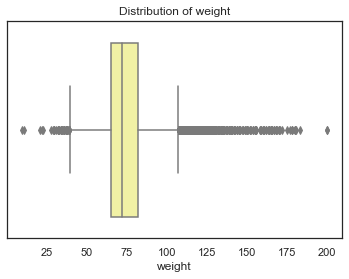

In [11]:
sns.set_style('white')
sns.boxplot(raw_data.weight,palette='terrain')
plt.title('Distribution of weight');

I will remove extremely rare cases of height and weight. As data is quite big, there will be no prblem while modelling.

In [12]:
raw_data = raw_data[(raw_data['height']<250) & (raw_data['weight']>20.0)]

There are many outliers in height and weight features. I combine both of these into a new feature bmi.

In [13]:
raw_data["bmi"] = (raw_data["weight"]/ (raw_data["height"]/100)**2).round(1)

In [14]:
raw_data[raw_data['bmi']<10]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
26806,63.7,1,157,23.0,110,80,1,1,0,0,1,0,9.3
29488,55.9,0,177,22.0,120,80,1,1,1,1,1,0,7.0
60188,59.8,1,162,21.0,120,80,2,1,0,0,1,1,8.0
60699,51.7,1,171,29.0,110,70,2,1,0,0,1,1,9.9


In [15]:
raw_data[raw_data['bmi']>100].sort_values(by='weight',ascending=False).head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
27384,41.9,1,80,178.0,140,90,3,3,0,0,1,1,278.1
8171,48.3,0,97,170.0,160,100,1,1,1,0,1,1,180.7
12770,53.6,1,75,168.0,120,80,1,1,1,0,1,1,298.7
15366,47.7,1,125,167.0,180,90,1,2,0,0,1,1,106.9
20028,54.1,1,112,167.0,180,120,1,1,0,1,1,0,133.1


Further, I will remove extremely underweight and obese people because such cases seems impossible. For example, there are observations with 80 cm height and 165 kgs weight which is quite impossible. May be it was a fake observation or typing mistake. Also, health conditions of dwarf and abnormally tall people are totally different so I don't want to include them.

In [16]:
data= raw_data[(raw_data['bmi']>10) & (raw_data['bmi']<100)].copy()

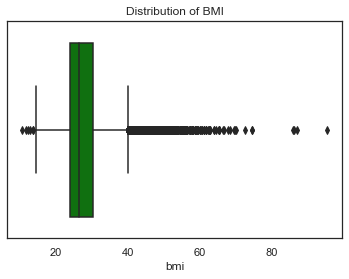

In [17]:
sns.boxplot(data.bmi,color='Green')
plt.title('Distribution of BMI');

In [18]:
data.drop(['weight','height'],axis=1,inplace=True)

Observations have been recorded mostly for people with age between 40 and 65


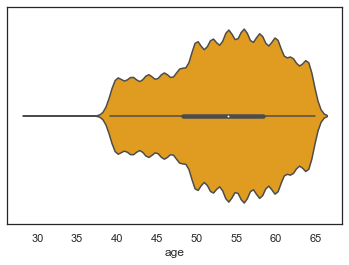

In [19]:
sns.violinplot(data.age,color='orange')
print("Observations have been recorded mostly for people with age between 40 and 65");

Now, I will remove outliers and abrupt blood pressure values.

In [20]:
(data['ap_lo']>360).sum()

952

In [21]:
(data['ap_hi']>360).sum()

39

In [22]:
data= data[(data['ap_lo']<360) & (data['ap_hi']<360)].copy()
data= data[(data['ap_lo']>20) & (data['ap_hi']>20)].copy()
data=data[data['ap_hi']>data['ap_lo']]

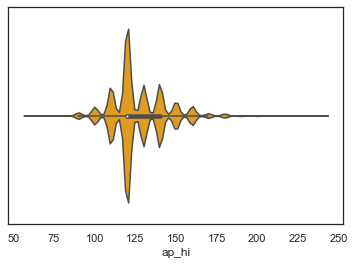

In [23]:
sns.violinplot(data.ap_hi,color='orange');

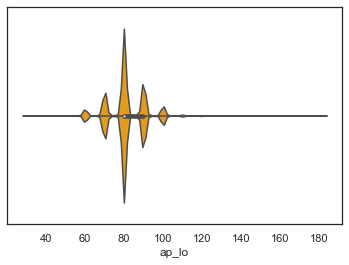

In [24]:
sns.violinplot(data.ap_lo,color='orange');

In [25]:
#creating dummy variables for categorical column
data['cholesterol']=data['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
data['gluc']=data['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
dummies = pd.get_dummies(data[['cholesterol','gluc']],drop_first=True)
final_data = pd.concat([data,dummies],axis=1)
final_data.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_data.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
0,50.4,0,110,80,0,0,1,0,22.0,1,0,1,0
1,55.4,1,140,90,0,0,1,1,34.9,0,1,1,0
2,51.6,1,130,70,0,0,0,1,23.5,0,1,1,0
3,48.2,0,150,100,0,0,1,1,28.7,1,0,1,0
4,47.8,1,100,60,0,0,0,0,23.0,1,0,1,0


In [26]:
#plotting using plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

print('Correlation of features with target variable')
final_data.corr()['cardio'].sort_values()[:-1].iplot(kind='barh');

Correlation of features with target variable


### Splitting and Standardizing data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(final_data.drop('cardio',axis=1),final_data.cardio,test_size=0.30)

to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo','bmi']
other_feat = ['gender', 'cholesterol_normal', 'cholesterol_well above normal',
       'gluc_normal', 'gluc_well above normal', 'smoke', 'alco', 'active']
scaler=StandardScaler()
scaler.fit(X_train[to_be_scaled_feat])
X_train[to_be_scaled_feat] = scaler.transform(X_train[to_be_scaled_feat])
X_test[to_be_scaled_feat] = scaler.transform(X_test[to_be_scaled_feat])

### Modelling

In [28]:
# importing classifiers
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score,classification_report

classifiers = {
    'Support Vector Machines' : SVC(),
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Support Vector Machines,73.59,0.72


# Improving Accuracy by Hyperparameter Tuning

## Random Forest (by GridSearchCV)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid=GridSearchCV(svc,param_grid=param_grid, verbose=10)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.729, total=  33.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.8s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.721, total=  33.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.717, total=  34.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.729, total=  33.7s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.730, total=  33.9s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.724, total=  36.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.721, total=  37.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.715, total=  37.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.7min remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.725, total=  37.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.3min remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.724, total=  36.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.730, total=  34.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.724, total=  34.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.723, total=  34.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.732, total=  35.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.732, total=  33.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.727, total=  34.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 405.1min finished


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC()
param_grid = [{'kernel': ['poly'], 'gamma': ['scale'], 'degree': [3],'C': [1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': ['scale'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['rbf'], 'gamma': ['scale'],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]
grid=GridSearchCV(svc,param_grid=param_grid, verbose=10)
grid.fit(X_train,y_train)
grid.best_params_


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, degree=3, gamma=scale, kernel=poly, score=0.731, total=  33.8s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.7s remaining:    0.0s


[CV]  C=1, degree=3, gamma=scale, kernel=poly, score=0.724, total=  33.5s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  C=1, degree=3, gamma=scale, kernel=poly, score=0.722, total=  33.2s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  C=1, degree=3, gamma=scale, kernel=poly, score=0.732, total=  33.0s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV]  C=1, degree=3, gamma=scale, kernel=poly, score=0.733, total=  32.7s
[CV] C=10, degree=3, gamma=scale, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s


[CV]  C=10, degree=3, gamma=scale, kernel=poly, score=0.730, total= 2.3min
[CV] C=10, degree=3, gamma=scale, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.1min remaining:    0.0s


[CV]  C=10, degree=3, gamma=scale, kernel=poly, score=0.724, total= 2.2min
[CV] C=10, degree=3, gamma=scale, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  7.3min remaining:    0.0s


[CV]  C=10, degree=3, gamma=scale, kernel=poly, score=0.722, total= 2.2min
[CV] C=10, degree=3, gamma=scale, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  9.5min remaining:    0.0s


[CV]  C=10, degree=3, gamma=scale, kernel=poly, score=0.731, total= 2.2min
[CV] C=10, degree=3, gamma=scale, kernel=poly ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.7min remaining:    0.0s


[CV]  C=10, degree=3, gamma=scale, kernel=poly, score=0.733, total= 2.2min
[CV] C=100, degree=3, gamma=scale, kernel=poly .......................
[CV]  C=100, degree=3, gamma=scale, kernel=poly, score=0.731, total=17.2min
[CV] C=100, degree=3, gamma=scale, kernel=poly .......................
[CV]  C=100, degree=3, gamma=scale, kernel=poly, score=0.725, total=16.7min
[CV] C=100, degree=3, gamma=scale, kernel=poly .......................
[CV]  C=100, degree=3, gamma=scale, kernel=poly, score=0.722, total=15.7min
[CV] C=100, degree=3, gamma=scale, kernel=poly .......................
[CV]  C=100, degree=3, gamma=scale, kernel=poly, score=0.731, total=16.7min
[CV] C=100, degree=3, gamma=scale, kernel=poly .......................
[CV]  C=100, degree=3, gamma=scale, kernel=poly, score=0.733, total=16.3min
[CV] C=1000, degree=3, gamma=scale, kernel=poly ......................
[CV]  C=1000, degree=3, gamma=scale, kernel=poly, score=0.731, total=133.8min
[CV] C=1000, degree=3, gamma=scale, kerne

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 1133.2min finished


{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [30]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10233
           1       0.77      0.68      0.72     10159

    accuracy                           0.74     20392
   macro avg       0.74      0.74      0.74     20392
weighted avg       0.74      0.74      0.74     20392



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC()
param_grid = [{'kernel': ['poly'], 'gamma': ['scale'], 'degree': [2],'C': [1, 10, 100]}]
grid=GridSearchCV(svc,param_grid=param_grid, cv=3, n_jobs=-1,verbose=10)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  4.3min remaining: 14.9min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  4.3min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  4.6min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  4.6min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  6.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.9min finished


{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

By using **GridSearchCV** we have increased accuracy of this model from 69% to 73%.

In [37]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74     10183
           1       0.76      0.67      0.71     10209

    accuracy                           0.73     20392
   macro avg       0.73      0.73      0.73     20392
weighted avg       0.73      0.73      0.73     20392



# Deep Neural Networks

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=1500)
parameter_space = {
    'hidden_layer_sizes': [(10,),(10,20),(20,30),(40,50),(50,),(10,10,10),(10,20,30),(30,40,50),(50,50,50),(50,100,50),(100,)],
    'activation': ['identity','logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001,0.001,0.01,0.05,0.1],
    'random_state': [0,1,12,24],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf.fit(X_train,y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)
print('Best score:\n', clf.best_score_)
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 3 folds for each of 2640 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10, 20, 30), 'random_state': 12, 'solver': 'adam'}
Best score:
 0.734210359891542
0.727 (+/-0.008) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 0, 'solver': 'lbfgs'}
0.726 (+/-0.009) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 0, 'solver': 'sgd'}
0.727 (+/-0.010) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 0, 'solver': 'adam'}
0.727 (+/-0.008) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 1, 'solver': 'lbfgs'}
0.727 (+/-0.008) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 1, 'solver': 'sgd'}
0.727 (+/-0.010) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'random_state': 1, 'solver': 'adam'}
0.727 (+/-0.008) for {'activation': 'identity'

In [40]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74     10267
           1       0.75      0.71      0.73     10125

    accuracy                           0.74     20392
   macro avg       0.74      0.74      0.74     20392
weighted avg       0.74      0.74      0.74     20392



In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils.testing import ignore_warnings
from math import floor


class MLPHyperparameters:
    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        self.randomSeed = randomSeed
        self.initDataset()
        self.kfold = model_selection.KFold(n_splits=self.NUM_FOLDS, random_state=self.randomSeed)

    def initDataset(self):

        self.X = X_train
        self.y = y_train

    # params contains floats representing the following:
    # 'hiddel_layer_sizes': up to 4 positive integers
    # 'activation': {'tanh', 'relu', 'logistic'},
    # 'solver': {'sdg', 'adam', 'lbfgs'},
    # 'alpha': float,
    # 'learning_rate': {'constant', 'invscaling', 'adaptive'}
    def convertParams(self, params):
        # transform the layer sizes from float (possibly negative) values into hiddenLayersSizes tuple
        if round(params[1]) <= 0:
            hiddenLayerSizes = round(params[0]),
        elif round(params[2]) <= 0:
            hiddenLayerSizes = (round(params[0]), round(params[1]))
        elif round(params[3]) <= 0:
            hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]))
        else:
            hiddenLayerSizes = (round(params[0]), round(params[1]), round(params[2]), round(params[3]))

        activation = ['tanh', 'relu', 'logistic'][floor(params[4])]
        solver = ['sgd', 'adam', 'lbfgs'][floor(params[5])]
        alpha = params[6]
        learning_rate = ['constant', 'invscaling', 'adaptive'][floor(params[7])]

        return hiddenLayerSizes, activation, solver, alpha, learning_rate

    @ignore_warnings(category=ConvergenceWarning)
    def getAccuracy(self, params):
        hiddenLayerSizes, activation, solver, alpha, learning_rate = self.convertParams(params)

        self.classifier = MLPClassifier(random_state=self.randomSeed,
                                        hidden_layer_sizes=hiddenLayerSizes,
                                        activation=activation,
                                        solver=solver,
                                        alpha=alpha,
                                        learning_rate=learning_rate)

        cv_results = model_selection.cross_val_score(self.classifier,
                                                     self.X,
                                                     self.y,
                                                     cv=self.kfold,
                                                     scoring='accuracy')

        mean = cv_results.mean()
        # print("-- mean: ", mean)
        return mean

    def formatParams(self, params):
        hiddenLayerSizes, activation, solver, alpha, learning_rate = self.convertParams(params)
        return "'hidden_layer_sizes'={}\n" \
            "'activation'={}\n" \
            "'solver'={}\n" \
            "'alpha'={}\n" \
            "'learning_rate'={}"\
            .format(hiddenLayerSizes, activation, solver, alpha, learning_rate)

In [30]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
                        halloffame=None, verbose=__debug__):
    """
    This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitness = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitness):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = fit

        # and the best back to population
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)
    return population, logbook

In [31]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.5
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.733118	0.695401
1  	79    	0.733118	0.721087
2  	85    	0.733391	0.731116
3  	80    	0.733391	0.732401
4  	79    	0.733391	0.730208
5  	85    	0.733391	0.73269 
6  	83    	0.733601	0.732785
7  	86    	0.733748	0.73277 
8  	83    	0.73379 	0.732896
9  	84    	0.73379 	0.732893
10 	80    	0.734063	0.733053
11 	81    	0.734063	0.733069
12 	83    	0.734253	0.733332
13 	74    	0.734253	0.733379
14 	83    	0.734274	0.733389
15 	83    	0.7344  	0.733635
16 	81    	0.7344  	0.733715
17 	84    	0.7344  	0.733716
18 	83    	0.7344  	0.733827
19 	79    	0.7344  	0.733912
20 	77    	0.7344  	0.734027
-Best solution is: 
 'hidden_layer_sizes'=(7, 3)
'activation'=tanh
'solver'=lbfgs
'alpha'=1.3091832532432477
'learning_rate'=adaptive 
 => accuracy =  0.7343997431545995


In [32]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.7
P_MUTATION = 0.5
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.733118	0.695401
1  	66    	0.733265	0.725891
2  	73    	0.733265	0.722346
3  	72    	0.73379 	0.730026
4  	78    	0.73379 	0.730167
5  	78    	0.73379 	0.725564
6  	80    	0.73379 	0.727937
7  	74    	0.73379 	0.732592
8  	79    	0.733853	0.730441
9  	78    	0.733853	0.732844
10 	83    	0.733853	0.732869
11 	70    	0.733853	0.733176
12 	79    	0.733853	0.733497
13 	74    	0.733853	0.733522
14 	73    	0.733853	0.733631
15 	76    	0.733853	0.733577
16 	79    	0.733853	0.733542
17 	81    	0.733853	0.733499
18 	79    	0.733853	0.733537
19 	79    	0.733853	0.733619
20 	75    	0.733853	0.733622
-Best solution is: 
 'hidden_layer_sizes'=(6, 7, 7)
'activation'=tanh
'solver'=lbfgs
'alpha'=1.8555043040509929
'learning_rate'=invscaling 
 => accuracy =  0.7338533171556956


In [33]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.5
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.733118	0.695401
1  	83    	0.733118	0.717324
2  	85    	0.733748	0.726356
3  	88    	0.733832	0.72753 
4  	84    	0.733832	0.730088
5  	88    	0.733832	0.728026
6  	86    	0.733832	0.73042 
7  	86    	0.734084	0.732985
8  	88    	0.734127	0.733026
9  	83    	0.734127	0.733112
10 	86    	0.734127	0.733182
11 	89    	0.734148	0.733325
12 	86    	0.734148	0.733187
13 	80    	0.734421	0.733376
14 	87    	0.734421	0.733665
15 	88    	0.734421	0.733739
16 	84    	0.73461 	0.733727
17 	87    	0.73461 	0.733787
18 	86    	0.73461 	0.733801
19 	81    	0.73461 	0.734083
20 	86    	0.73461 	0.733904
-Best solution is: 
 'hidden_layer_sizes'=(7, 3)
'activation'=tanh
'solver'=lbfgs
'alpha'=1.3011763343175522
'learning_rate'=invscaling 
 => accuracy =  0.7346099331667417


In [31]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.7
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.734021	0.696161
1  	87    	0.73419 	0.723862
2  	89    	0.734421	0.717733
3  	88    	0.734421	0.728614
4  	89    	0.735114	0.726317
5  	85    	0.735114	0.723791
6  	88    	0.735114	0.731217
7  	87    	0.735114	0.731168
8  	89    	0.735114	0.731444
9  	89    	0.735114	0.733843
10 	90    	0.735114	0.733807
11 	90    	0.735114	0.73395 
12 	87    	0.735114	0.733951
13 	90    	0.735114	0.733939
14 	88    	0.735114	0.734044
15 	89    	0.735114	0.733945
16 	88    	0.735114	0.731602
17 	85    	0.735114	0.734068
18 	87    	0.735114	0.734212
19 	87    	0.735114	0.734267
20 	86    	0.735114	0.734493
-Best solution is: 
 'hidden_layer_sizes'=(11, 7, 4)
'activation'=logistic
'solver'=lbfgs
'alpha'=0.5474400737835006
'learning_rate'=adaptive 
 => accuracy =  0.7351142849380317


In [32]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.734021	0.696161
1  	80    	0.73419 	0.722842
2  	83    	0.734421	0.728552
3  	79    	0.734421	0.731057
4  	79    	0.734421	0.720869
5  	77    	0.734421	0.726646
6  	87    	0.734673	0.731289
7  	80    	0.734673	0.72901 
8  	77    	0.734799	0.733906
9  	80    	0.734799	0.726839
10 	82    	0.734799	0.7316  
11 	87    	0.734799	0.734045
12 	82    	0.734799	0.733999
13 	88    	0.734799	0.734256
14 	82    	0.734799	0.734368
15 	85    	0.734799	0.734453
16 	81    	0.734799	0.734586
17 	74    	0.734841	0.734608
18 	80    	0.735009	0.734588
19 	74    	0.735009	0.734558
20 	80    	0.735009	0.734614
-Best solution is: 
 'hidden_layer_sizes'=(15,)
'activation'=logistic
'solver'=lbfgs
'alpha'=0.8444537783265358
'learning_rate'=invscaling 
 => accuracy =  0.7350091877231079


In [33]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.9
P_MUTATION = 0.01
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max     	avg     
0  	100   	0.734021	0.696161
1  	80    	0.73419 	0.722829
2  	76    	0.734316	0.730558
3  	86    	0.734715	0.731111
4  	88    	0.734715	0.733541
5  	83    	0.734715	0.731242
6  	80    	0.734715	0.733629
7  	76    	0.734715	0.73145 
8  	82    	0.734715	0.726618
9  	76    	0.734715	0.73139 
10 	88    	0.734715	0.724391
11 	80    	0.734715	0.729135
12 	88    	0.734715	0.724988
13 	80    	0.734715	0.729448
14 	80    	0.734715	0.729664
15 	84    	0.734715	0.734574
16 	80    	0.734715	0.734663
17 	76    	0.734715	0.734715
18 	88    	0.734715	0.734715
19 	84    	0.734715	0.73471 
20 	80    	0.734715	0.734715
-Best solution is: 
 'hidden_layer_sizes'=(9, 4, 1, 8)
'activation'=tanh
'solver'=lbfgs
'alpha'=0.4846101966625269
'learning_rate'=constant 
 => accuracy =  0.7347149243567322


In [31]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.1
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max    	avg     
0  	100   	0.73564	0.697029
1  	73    	0.73564	0.725433
2  	67    	0.735703	0.731628
3  	80    	0.735892	0.730018
4  	78    	0.736228	0.730005
5  	77    	0.736228	0.730499
6  	81    	0.736228	0.732588
7  	75    	0.736228	0.735052
8  	74    	0.736228	0.735136
9  	78    	0.736228	0.73511 
10 	82    	0.736228	0.735245
11 	65    	0.736291	0.728265
12 	85    	0.736501	0.733143
13 	63    	0.736501	0.733276
14 	65    	0.736543	0.735905
15 	77    	0.736543	0.736068
16 	77    	0.736564	0.736126
17 	74    	0.736564	0.736142
18 	77    	0.736564	0.736235
19 	71    	0.736564	0.736291
20 	76    	0.736564	0.736294
-Best solution is: 
 'hidden_layer_sizes'=(10, 3, 1)
'activation'=tanh
'solver'=lbfgs
'alpha'=0.7089162717867971
'learning_rate'=constant 
 => accuracy =  0.7365644078275558


In [32]:
from deap import base
from deap import tools
from deap import creator
import random
import numpy as np

# boundaries for all parameters:
# 'hidden_layer_sizes': first four values
# 'activation': ['tanh', 'relu', 'logistic'] -> 0, 1, 2
# 'solver': ['sgd', 'adam', 'lbfgs'] -> 0, 1, 2
# 'alpha': float in the range of [0.0001, 2.0],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'] -> 0, 1, 2
BOUNDS_LOW = [5, -5, -10, -20, 0, 0, 0.0001, 0]
BOUNDS_HIGH = [15, 10, 10, 10, 2.999, 2.999, 2.0, 2.999]

NUM_OF_PARAMS = len(BOUNDS_HIGH)

# Genetic Algorithm constants
POPULATION_SIZE = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.01
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10
CROWDING_FACTOR = 20.0

# set the random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the classifier accuracy class
test = MLPHyperparameters(RANDOM_SEED)

toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list
creator.create("Individual", list, fitness=creator.FitnessMax)

# define the layer size attributes individually
for i in range(NUM_OF_PARAMS):
    # 'attribute_0', 'attribute_1', ...
    toolbox.register("attribute_" + str(i), random.uniform, BOUNDS_LOW[i], BOUNDS_HIGH[i])

# create a tuple containing an attribute generator for each param searched
attributes = ()
for i in range(NUM_OF_PARAMS):
    attributes = attributes + (toolbox.__getattribute__("attribute_" + str(i)),)

# create the individual operator to fill up an Individual instance
toolbox.register("individualCreator", tools.initCycle, creator.Individual, attributes, n=1)

# create the population operator to generate a list of individuals
toolbox.register("populationCreator",
                 tools.initRepeat,
                 list,
                 toolbox.individualCreator)

# fitness calculation
def classificationAccuracy(individual):
    return test.getAccuracy(individual),

toolbox.register("evaluate", classificationAccuracy)

# genetic operators: mutFlitBit

# genetic operators
toolbox.register("select", tools.selTournament, tournsize=2)

toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR)

toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=CROWDING_FACTOR, indpb=1.0/NUM_OF_PARAMS)

# Genetic Algorithm flow
def main():
    # create initial population (generation 0)
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # preparate the statistics objects
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    # define the hall_of_fame object
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the genetic algorithm flow with hof feature added
    population, logbook = eaSimpleWithElitism(population,
                                              toolbox,
                                              cxpb=P_CROSSOVER,
                                              mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats,
                                              halloffame=hof,
                                              verbose=True)

    # print best solution found
    print("-Best solution is: \n",
          test.formatParams(hof.items[0]),
          "\n => accuracy = ",
          hof.items[0].fitness.values[0])


if __name__ == '__main__':
    main()

gen	nevals	max    	avg     
0  	100   	0.73564	0.697029
1  	70    	0.73564	0.725433
2  	82    	0.736018	0.724688
3  	74    	0.736018	0.730055
4  	68    	0.73627 	0.732548
5  	74    	0.736354	0.73508 
6  	80    	0.736354	0.7328  
7  	82    	0.736354	0.735216
8  	72    	0.736396	0.735625
9  	78    	0.736396	0.735725
10 	76    	0.736438	0.735991
11 	80    	0.736438	0.736096
12 	59    	0.736438	0.736175
13 	84    	0.736543	0.736186
14 	70    	0.736585	0.736304
15 	72    	0.736585	0.736212
16 	75    	0.736585	0.736192
17 	76    	0.736585	0.736146
18 	70    	0.736585	0.736283
19 	70    	0.736585	0.736327
20 	80    	0.736585	0.736384
-Best solution is: 
 'hidden_layer_sizes'=(9, 4)
'activation'=tanh
'solver'=lbfgs
'alpha'=0.4651136972488358
'learning_rate'=constant 
 => accuracy =  0.7365854095997184


In [32]:
#splitting further into validation set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

model = Sequential()
leaky_relu = LeakyReLU(alpha=0.01)
model.add(Dense(12,activation=leaky_relu))
model.add(Dense(50,activation=leaky_relu,kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation=leaky_relu,kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation=leaky_relu,kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
381/381 [==============================] - 3s 5ms/step - loss: 0.6089 - val_loss: 0.5533
Epoch 2/150
381/381 [==============================] - 1s 2ms/step - loss: 0.5559 - val_loss: 0.5490
Epoch 3/150
381/381 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5482
Epoch 4/150
381/381 [==============================] - 1s 2ms/step - loss: 0.5515 - val_loss: 0.5484
Epoch 5/150
381/381 [==============================] - 1s 2ms/step - loss: 0.5514 - val_loss: 0.5490
Epoch 6/150
381/381 [==============================] - 1s 1ms/step - loss: 0.5477 - val_loss: 0.5481
Epoch 7/150
381/381 [==============================] - 1s 1ms/step - loss: 0.5476 - val_loss: 0.5468
Epoch 8/150
381/381 [==============================] - ETA: 0s - loss: 0.549 - 1s 1ms/step - loss: 0.5496 - val_loss: 0.5470
Epoch 9/150
381/381 [==============================] - 1s 1ms/step - loss: 0.5474 - val_loss: 0.5464
Epoch 10/150
381/381 [==============================] - 1s 1ms/step

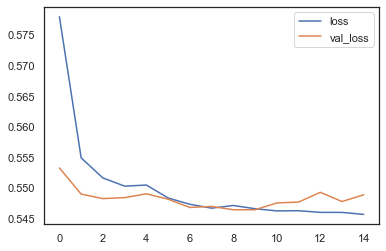

In [33]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [34]:
dnn_pred = model.predict_classes(X_test)
print(classification_report(y_test,dnn_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10267
           1       0.77      0.67      0.72     10125

    accuracy                           0.74     20392
   macro avg       0.74      0.73      0.73     20392
weighted avg       0.74      0.74      0.73     20392



# Results

In [42]:
results.loc['SVC(Improved)']= [100*np.round(accuracy_score(y_test,y_pred),decimals=4),
                         round(f1_score(y_test,y_pred),2)]
results.loc['Deep Neural Network']= [100*np.round(accuracy_score(y_test,dnn_pred),decimals=4),
                         round(f1_score(y_test,dnn_pred),2)]
results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
Support Vector Machines,73.590000,0.720000
SVC(Improved),73.590000,0.730000
Deep Neural Network,73.510000,0.720000
